<a href="https://colab.research.google.com/github/rodrigorissettoterra/Data-Visualization-MatplotLib/blob/main/Data_Visualization_com_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Visualização de dados com Matplotlib

##Preparando o ambiente

### Montagem do Drive (Google)

In [124]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Importando as bibliotecas necessárias

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

###Abrindo a Base de dados

In [126]:
df = pd.read_csv('/content/drive/MyDrive/Base de dados/monitoramento_tempo.csv')
df.head()

,temperatura,pressão,humidade,direção do vento,velocidade do vento,dia_da_semana,data
0,282.080000,1024.0,81.0,0.0,0.0,Domingo,2012-10-01 12:00:00
1,282.080000,1024.0,81.0,0.0,0.0,Domingo,2012-10-01 13:00:00
2,282.083252,1024.0,80.0,4.0,0.0,Domingo,2012-10-01 14:00:00
3,282.091866,1024.0,80.0,18.0,0.0,Domingo,2012-10-01 15:00:00
4,282.100481,1024.0,80.0,31.0,0.0,Domingo,2012-10-01 16:00:00


###Dados faltantes

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temperatura          45253 non-null  float64
 1   pressão              45253 non-null  float64
 2   humidade             45253 non-null  float64
 3   direção do vento     45253 non-null  float64
 4   velocidade do vento  45253 non-null  float64
 5   dia_da_semana        45253 non-null  object 
 6   data                 45253 non-null  object 
dtypes: float64(5), object(2)
memory usage: 2.4+ MB


Sem dados nulos

###Convertendo o tipo da variável 'Data'

In [128]:
df['data'] = pd.to_datetime(df['data'])

##Visualizando alguns dados

###Temperatura x Data

####Gráfico de linha

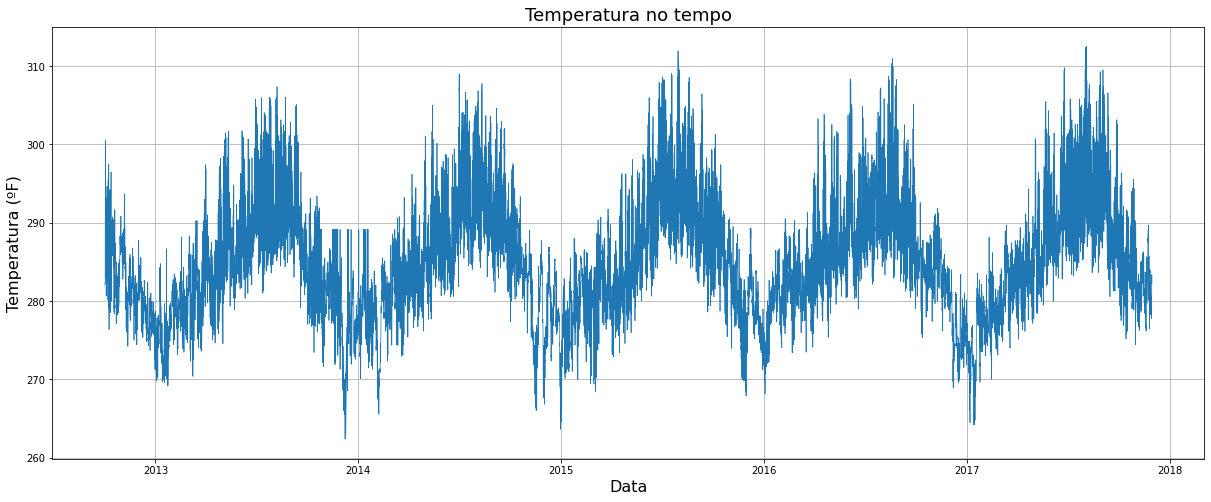

In [129]:
fig = plt.figure(figsize = (16,6))
eixo = fig.add_axes([0,0,1,1])
ax = plt.plot(df['data'], df['temperatura'], lw = 0.7)
plt.xlabel('Data', fontsize = 16)
plt.ylabel('Temperatura (ºF)', fontsize = 16)
ax = plt.title('Temperatura no tempo', fontsize = 18)
eixo.grid(True)

####Zoom de 2014 a 2015

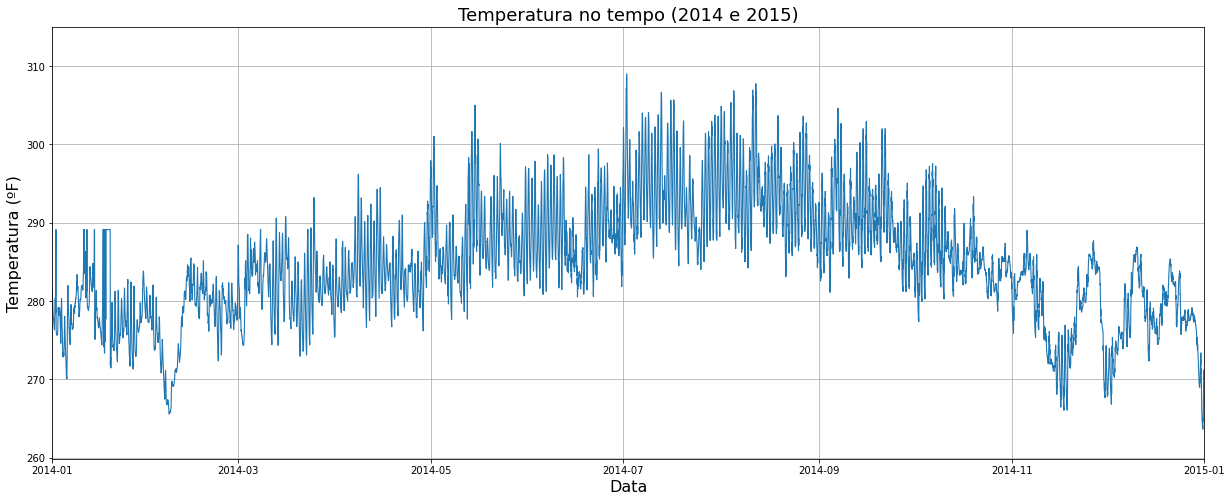

In [130]:
fig = plt.figure(figsize = (16,6))
eixo = fig.add_axes([0,0,1,1])
ax = plt.plot(df['data'], df['temperatura'], lw = 1.1)
eixo.set_xlim(datetime.datetime(2014,1,1),datetime.datetime(2015,1,1))
plt.xlabel('Data', fontsize = 16)
plt.ylabel('Temperatura (ºF)', fontsize = 16)
ax = plt.title('Temperatura no tempo (2014 e 2015)', fontsize = 18)
eixo.grid(True)

####Incluindo um filtro na visualização

Text(0.5, 0, 'Data')

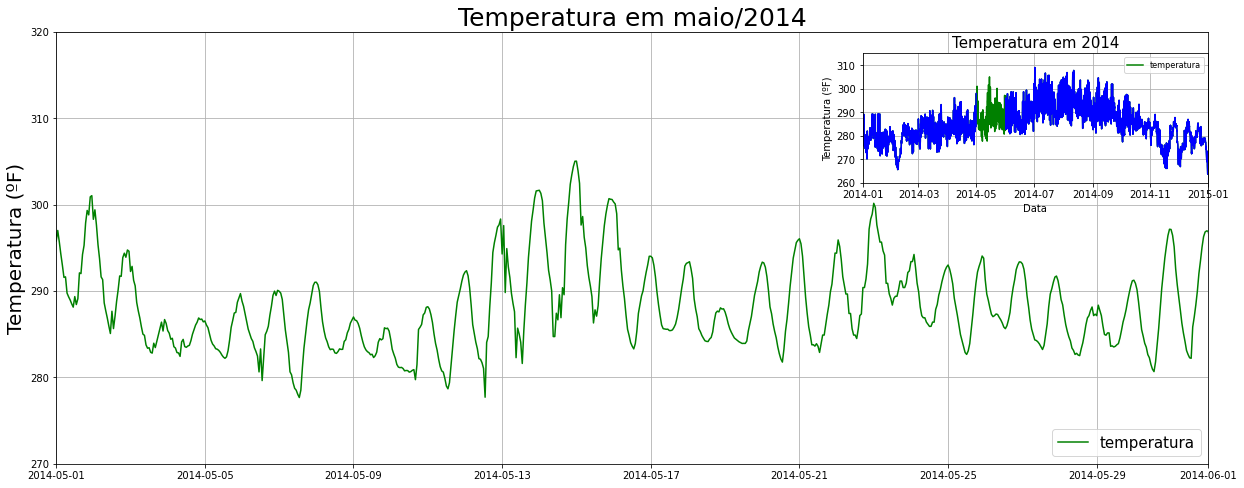

In [131]:
fig = plt.figure(figsize = (16,6))
eixo = fig.add_axes([0,0,1,1])
eixo2 = fig.add_axes([0.7,0.65,0.3,0.3])
eixo.grid(True)
eixo2.grid(True)
eixo.plot(df['data'], df['temperatura'], color ='g')
eixo.set_xlim(datetime.datetime(2014,5,1),datetime.datetime(2014,6,1))
eixo.set_ylim(270,320)
eixo.set_title('Temperatura em maio/2014', fontsize = 25)
eixo.legend(['temperatura'], loc = 'lower right', fontsize = 15)
eixo.set_ylabel('Temperatura (ºF)', fontsize = 20)

azul_esquerda = df['data'] < datetime.datetime(2014,5,1)
azul_direita = df['data'] > datetime.datetime(2014,6,1)

eixo2.plot(df['data'], df['temperatura'], color = 'g')
eixo2.plot(df[azul_esquerda]['data'], df[azul_esquerda]['temperatura'], color = 'b')
eixo2.plot(df[azul_direita]['data'], df[azul_direita]['temperatura'], color = 'b')
eixo2.set_xlim(datetime.datetime(2014,1,1), datetime.datetime(2015,1,1))
eixo2.set_title('Temperatura em 2014', fontsize = 15)
eixo2.legend(['temperatura'], loc = 'best', fontsize = 8)
eixo2.set_ylabel('Temperatura (ºF)', fontsize = 10)
eixo2.set_xlabel('Data', fontsize = 10)

####Indicando os pontos de Máximo e de Mínimo

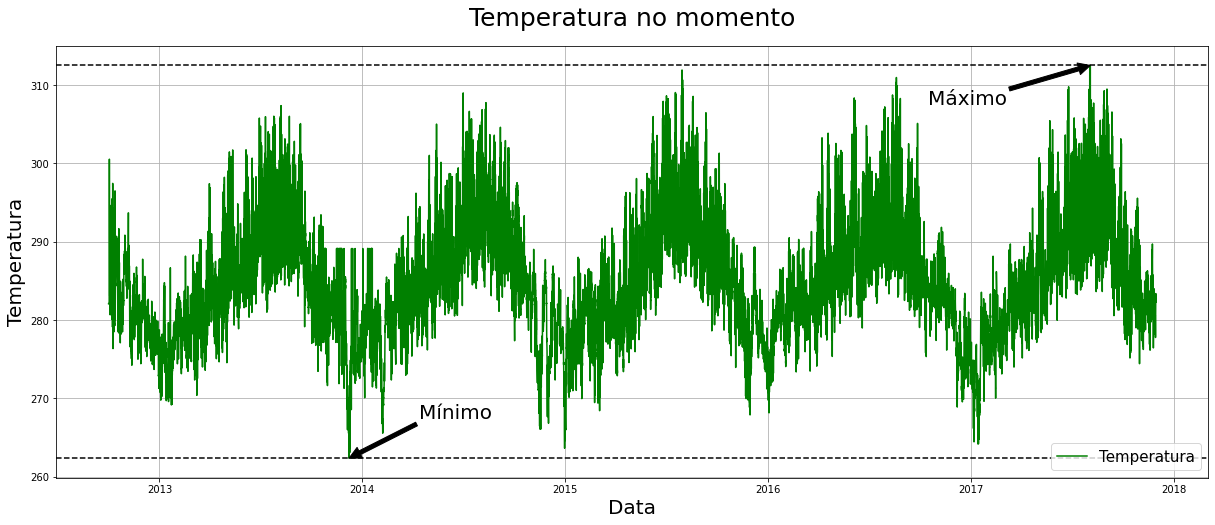

In [132]:
fig = plt.figure(figsize = (16,6))
eixo = fig.add_axes([0,0,1,1])

eixo.plot(df['data'], df['temperatura'], color ='g')
eixo.set_title('Temperatura no momento', fontsize = 25, pad = 20)
eixo.set_ylabel('Temperatura', fontsize = 20)
eixo.set_xlabel('Data', fontsize = 20)
eixo.legend(['Temperatura'], loc = 'lower right', fontsize = 15)
eixo.grid(True)

x1 = df['data'][df['temperatura'].idxmax()]
y1 = max(df['temperatura'])
x2 = df['data'][df['temperatura'].idxmax()-7000]
y2 = max(df['temperatura'] - 5)
eixo.annotate('Máximo', xy = (x1, y1), fontsize = 20, xytext = (x2,y2), arrowprops = dict(facecolor ='k'))

x3 = df['data'][df['temperatura'].idxmin()]
y3 = min(df['temperatura'])
x4 = df['data'][df['temperatura'].idxmin()+3000]
y4 = min(df['temperatura'] + 5)
eixo.annotate('Mínimo', xy = (x3, y3), fontsize = 20, xytext = (x4,y4), arrowprops = dict(facecolor ='k'))

eixo.axhline(max(df['temperatura']), color = 'k', linestyle ='--')
eixo.axhline(min(df['temperatura']), color = 'k', linestyle ='--')

###Temperatura x Dias da semana

In [133]:
temperatura_por_dia_da_semana = df.groupby('dia_da_semana')['temperatura'].mean()
nome_dias = ['Domingo','Segunda','Terça','Quarta','Quinta','Sexta','Sábado']
temperatura_por_dia_da_semana = temperatura_por_dia_da_semana[nome_dias]
temperatura_por_dia_da_semana

dia_da_semana
Domingo    285.009095
Segunda    284.985382
Terça      284.892811
Quarta     284.998290
Quinta     285.000643
Sexta      285.060886
Sábado     285.003316
Name: temperatura, dtype: float64

[Text(0, 0, 'Domingo'),
 Text(0, 0, 'Segunda'),
 Text(0, 0, 'Terça'),
 Text(0, 0, 'Quarta'),
 Text(0, 0, 'Quinta'),
 Text(0, 0, 'Sexta'),
 Text(0, 0, 'Sábado')]

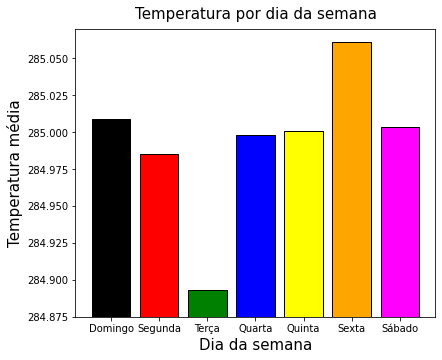

In [134]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

indice = range(len(temperatura_por_dia_da_semana))

cores = ['black', 'r', 'g', 'b', 'yellow', 'orange', 'magenta']

eixo.set_ylim(284.875,285.07)

eixo.bar(indice, temperatura_por_dia_da_semana, color = cores, edgecolor = 'k')
eixo.set_title('Temperatura por dia da semana', fontsize = 15, pad = 10)
eixo.set_xlabel('Dia da semana', fontsize = 15)
eixo.set_ylabel('Temperatura média', fontsize = 15)
eixo.set_xticks(indice)
eixo.set_xticklabels(nome_dias)

#Base de dados: Íris

##Preparando o ambiente

###Importando as bibliotecas necessárias

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

###Abrindo a Base de dados

In [136]:
dados = pd.read_csv('/content/drive/MyDrive/Base de dados/iris.csv')
dados.head()

,comprimento_sépala,largura_sépala,comprimento_pétala,largura_pétala,espécie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


###Dados faltantes

In [137]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   comprimento_sépala  150 non-null    float64
 1   largura_sépala      150 non-null    float64
 2   comprimento_pétala  150 non-null    float64
 3   largura_pétala      150 non-null    float64
 4   espécie             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Não temos dados ausentes na base de dados

##Visualizando alguns dados

###Dispersão

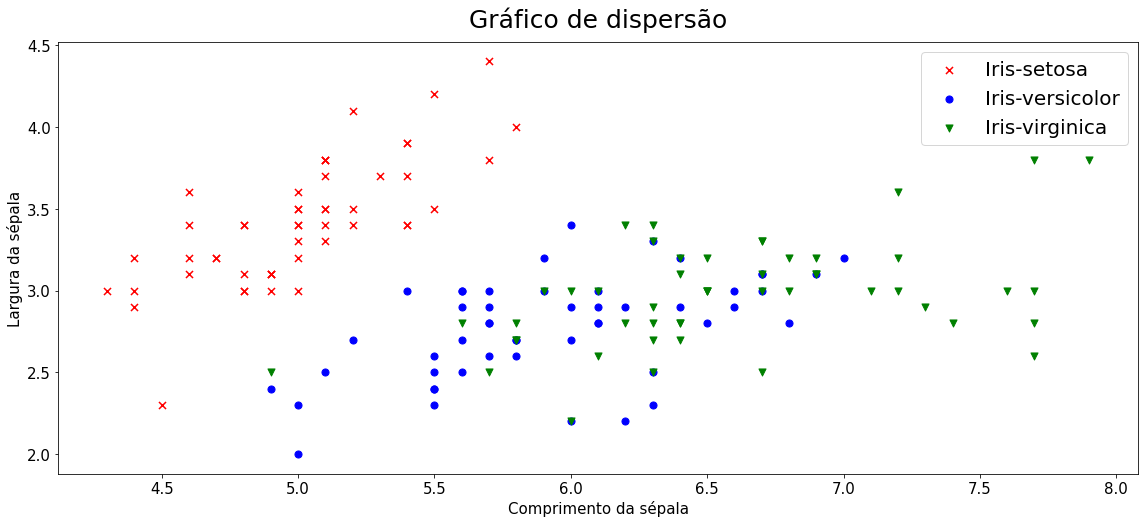

In [138]:
fig = plt.figure(figsize = (15,6))
eixo = fig.add_axes([0,0,1,1])

cores = {'Iris-setosa':'r', 'Iris-versicolor':'b', 'Iris-virginica':'g'}
marcadores = {'Iris-setosa':'x', 'Iris-versicolor':'o', 'Iris-virginica':'v'}

for especie in dados['espécie'].unique():
  tmp = dados[dados['espécie'] == especie]
  eixo.scatter(tmp['comprimento_sépala'], 
               tmp['largura_sépala'], 
               color = cores[especie], 
               marker = marcadores[especie],
               s = 50)

eixo.set_title('Gráfico de dispersão', fontsize = 25, pad = 15)
eixo.set_xlabel('Comprimento da sépala', fontsize = 15)
eixo.set_ylabel('Largura da sépala', fontsize = 15)
eixo.tick_params(labelsize = 15)
eixo.legend(cores, fontsize = 20)

###Boxplot

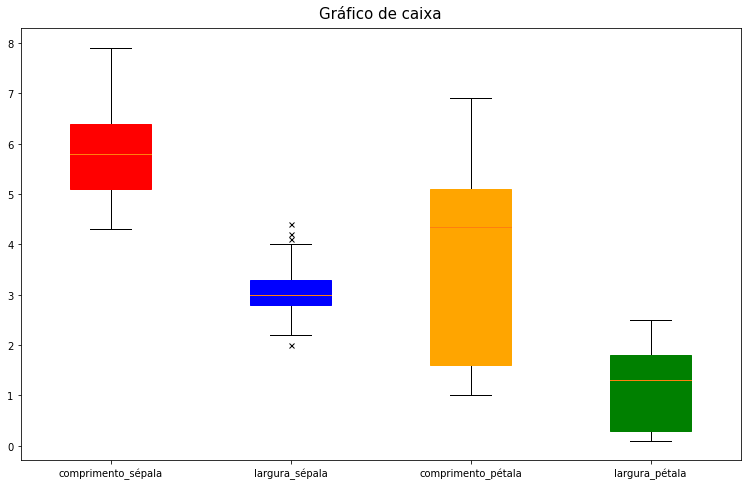

In [139]:
fig = plt.figure(figsize = (10,6))
eixo = fig.add_axes([0,0,1,1])

cores =['red','blue','orange','green']

caixas = eixo.boxplot(dados.drop('espécie', axis = 1).values, patch_artist = True)
eixo.set_title('Gráfico de caixa', fontsize = 15, pad = 10)
eixo.set_xticklabels(dados.drop('espécie', axis = 1).columns)

for caixa, cor in zip(caixas['boxes'], cores):
  caixa.set(color = cor)

for outlier in caixas['fliers']:
  outlier.set(marker = 'x', markersize = 5)

### HIstograma

Text(4.3999999999999995, 30, 'mediana')

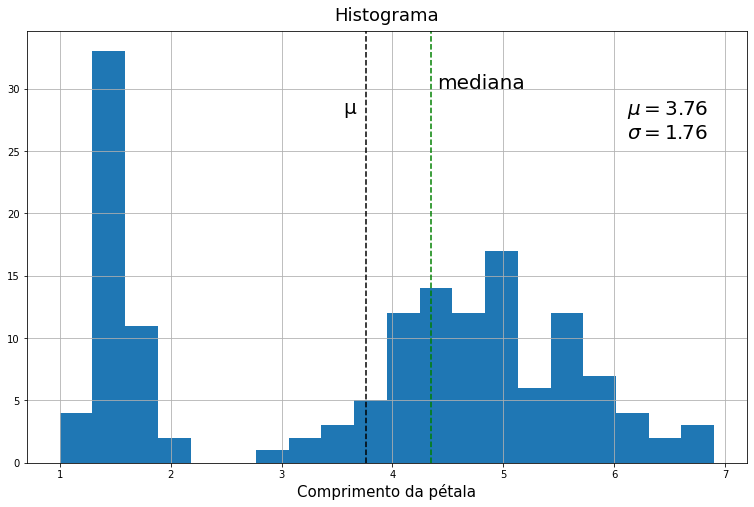

In [140]:
fig = plt.figure(figsize = (10,6))
eixo = fig.add_axes([0,0,1,1])

mu, sigma = dados['comprimento_pétala'].mean(), dados['comprimento_pétala'].std()

eixo.hist(dados['comprimento_pétala'], bins = 20)
eixo.set_title('Histograma', fontsize = 18, pad = 10)
eixo.set_xlabel('Comprimento da pétala', fontsize = 15)
eixo.grid(True)
eixo.annotate('$μ = {0:.2f}$\n$σ = {1:.2f}$'.format(mu, sigma), xy = (6.11,26), fontsize = 20)

eixo.axvline(mu, color ='k', linestyle ='--')
eixo.annotate('μ', xy = (mu-0.2,28), fontsize = 20)

eixo.axvline(dados['comprimento_pétala'].median(), color ='g', linestyle ='--')
eixo.annotate('mediana', xy = (dados['comprimento_pétala'].median()+0.05,30), fontsize = 20)

###Dividindo por espécie

####Iris - Setosa

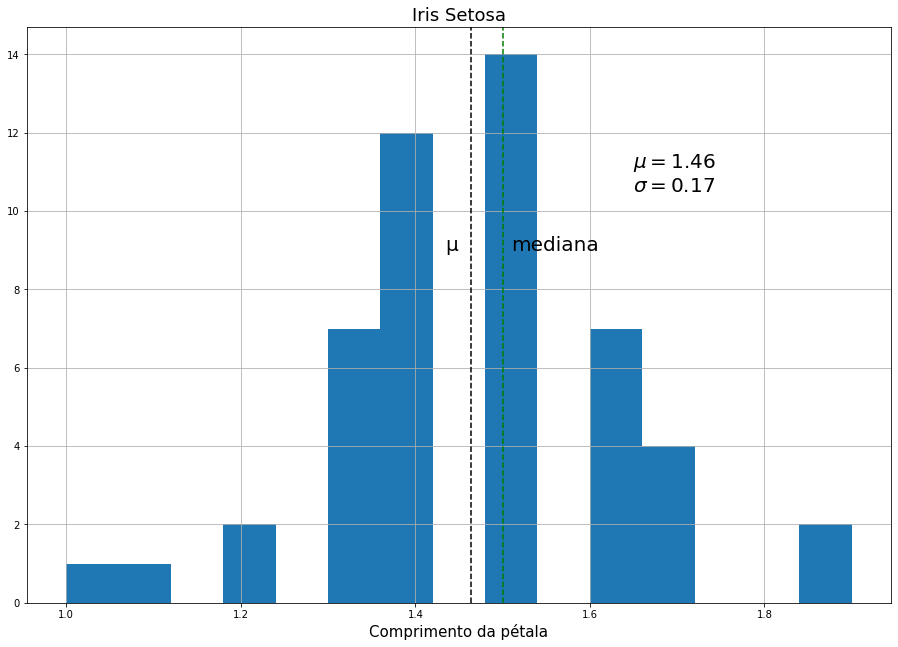

In [141]:
fig = plt.figure(figsize = (12,8))
eixo = fig.add_axes([0,0,1,1])

df_is = dados[dados['espécie'] == 'Iris-setosa']

mu, sigma = df_is['comprimento_pétala'].mean(), df_is['comprimento_pétala'].std()

eixo.hist(df_is['comprimento_pétala'], bins = 15)
eixo.set_title('Iris Setosa', fontsize = 18)
eixo.set_xlabel('Comprimento da pétala', fontsize = 15)
eixo.grid(True)
eixo.annotate('$μ = {0:.2f}$\n$σ = {1:.2f}$'.format(mu, sigma), xy = (1.65,10.5), fontsize = 20)

eixo.axvline(mu, color ='k', linestyle ='--')
eixo.annotate('μ', xy = (mu-0.03,9), fontsize = 20)

eixo.axvline(df_is['comprimento_pétala'].median(), color ='g', linestyle ='--')
eixo.annotate('mediana', xy = (df_is['comprimento_pétala'].median()+0.01,9), fontsize = 20)

fig.savefig('histograma_Iris_Setosa.png', bbox_inches = 'tight')

####Iris - Versicolor

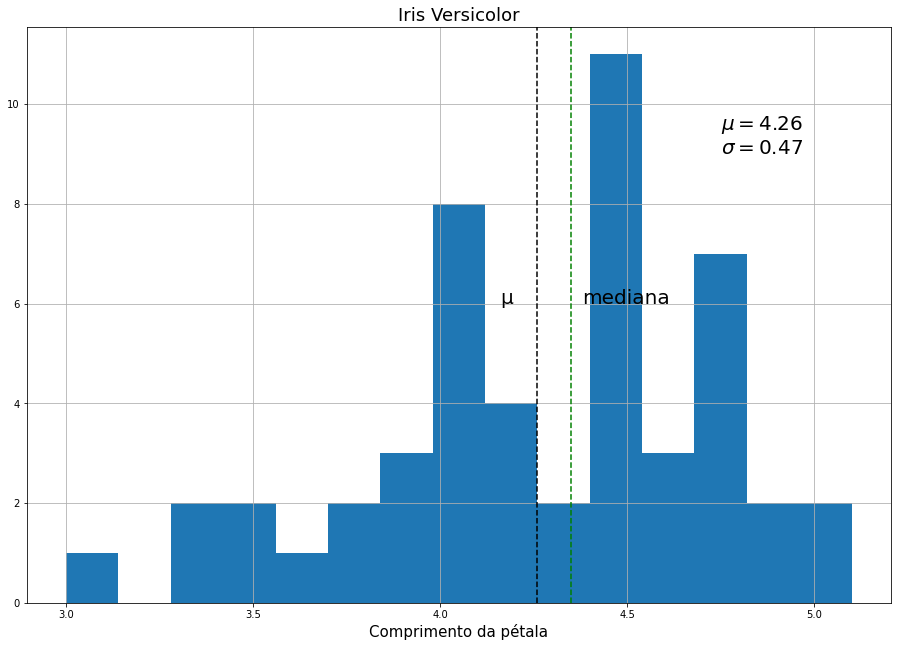

In [142]:
fig = plt.figure(figsize = (12,8))
eixo = fig.add_axes([0,0,1,1])

df_iv = dados[dados['espécie'] == 'Iris-versicolor']

mu, sigma = df_iv['comprimento_pétala'].mean(), df_iv['comprimento_pétala'].std()

eixo.hist(df_iv['comprimento_pétala'], bins = 15)
eixo.set_title('Iris Versicolor', fontsize = 18)
eixo.set_xlabel('Comprimento da pétala', fontsize = 15)
eixo.grid(True)
eixo.annotate('$μ = {0:.2f}$\n$σ = {1:.2f}$'.format(mu, sigma), xy = (4.75,9), fontsize = 20)

eixo.axvline(mu, color ='k', linestyle ='--')
eixo.annotate('μ', xy = (mu-0.1,6), fontsize = 20)

eixo.axvline(df_iv['comprimento_pétala'].median(), color ='g', linestyle ='--')
eixo.annotate('mediana', xy = (df_iv['comprimento_pétala'].median()+0.03,6), fontsize = 20)

fig.savefig('histograma_Iris_Versicolor.png', bbox_inches = 'tight')

####Iris - Virginica

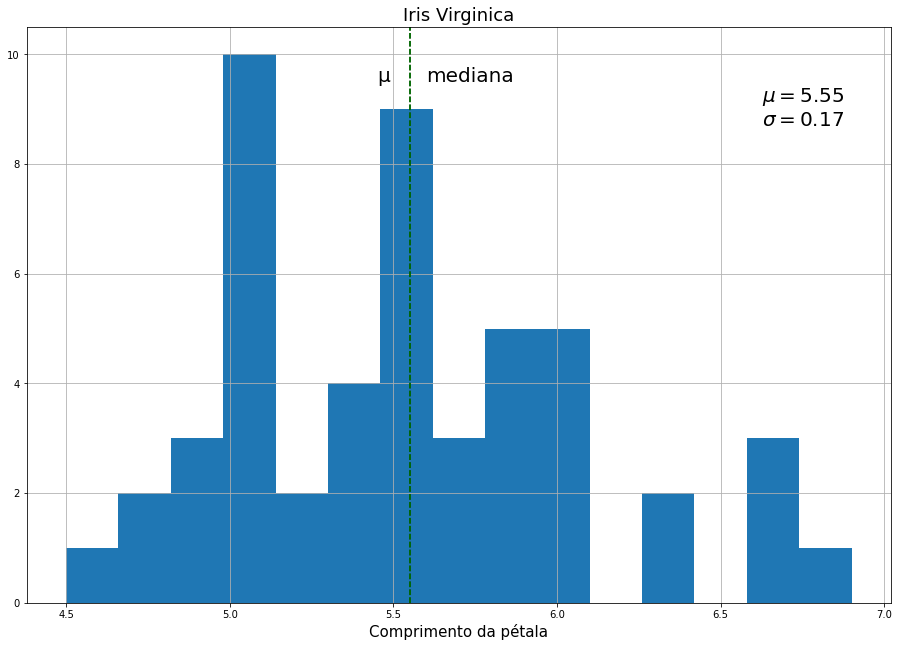

In [143]:
fig = plt.figure(figsize = (12,8))
eixo = fig.add_axes([0,0,1,1])

df_ivi = dados[dados['espécie'] == 'Iris-virginica']

mu, sigma = df_ivi['comprimento_pétala'].mean(), df_is['comprimento_pétala'].std()

eixo.hist(df_ivi['comprimento_pétala'], bins = 15)
eixo.set_title('Iris Virginica', fontsize = 18)
eixo.set_xlabel('Comprimento da pétala', fontsize = 15)
eixo.grid(True)
eixo.annotate('$μ = {0:.2f}$\n$σ = {1:.2f}$'.format(mu, sigma), xy = (6.625,8.7), fontsize = 20)

eixo.axvline(mu, color ='k', linestyle ='--')
eixo.annotate('μ', xy = (mu-0.1,9.5), fontsize = 20)

eixo.axvline(df_ivi['comprimento_pétala'].median(), color ='g', linestyle ='--')
eixo.annotate('mediana', xy = (df_ivi['comprimento_pétala'].median()+0.05,9.5), fontsize = 20)

fig.savefig('histograma_Iris_Virginica.png', bbox_inches = 'tight')

###Exportando as imagens dos gráficos

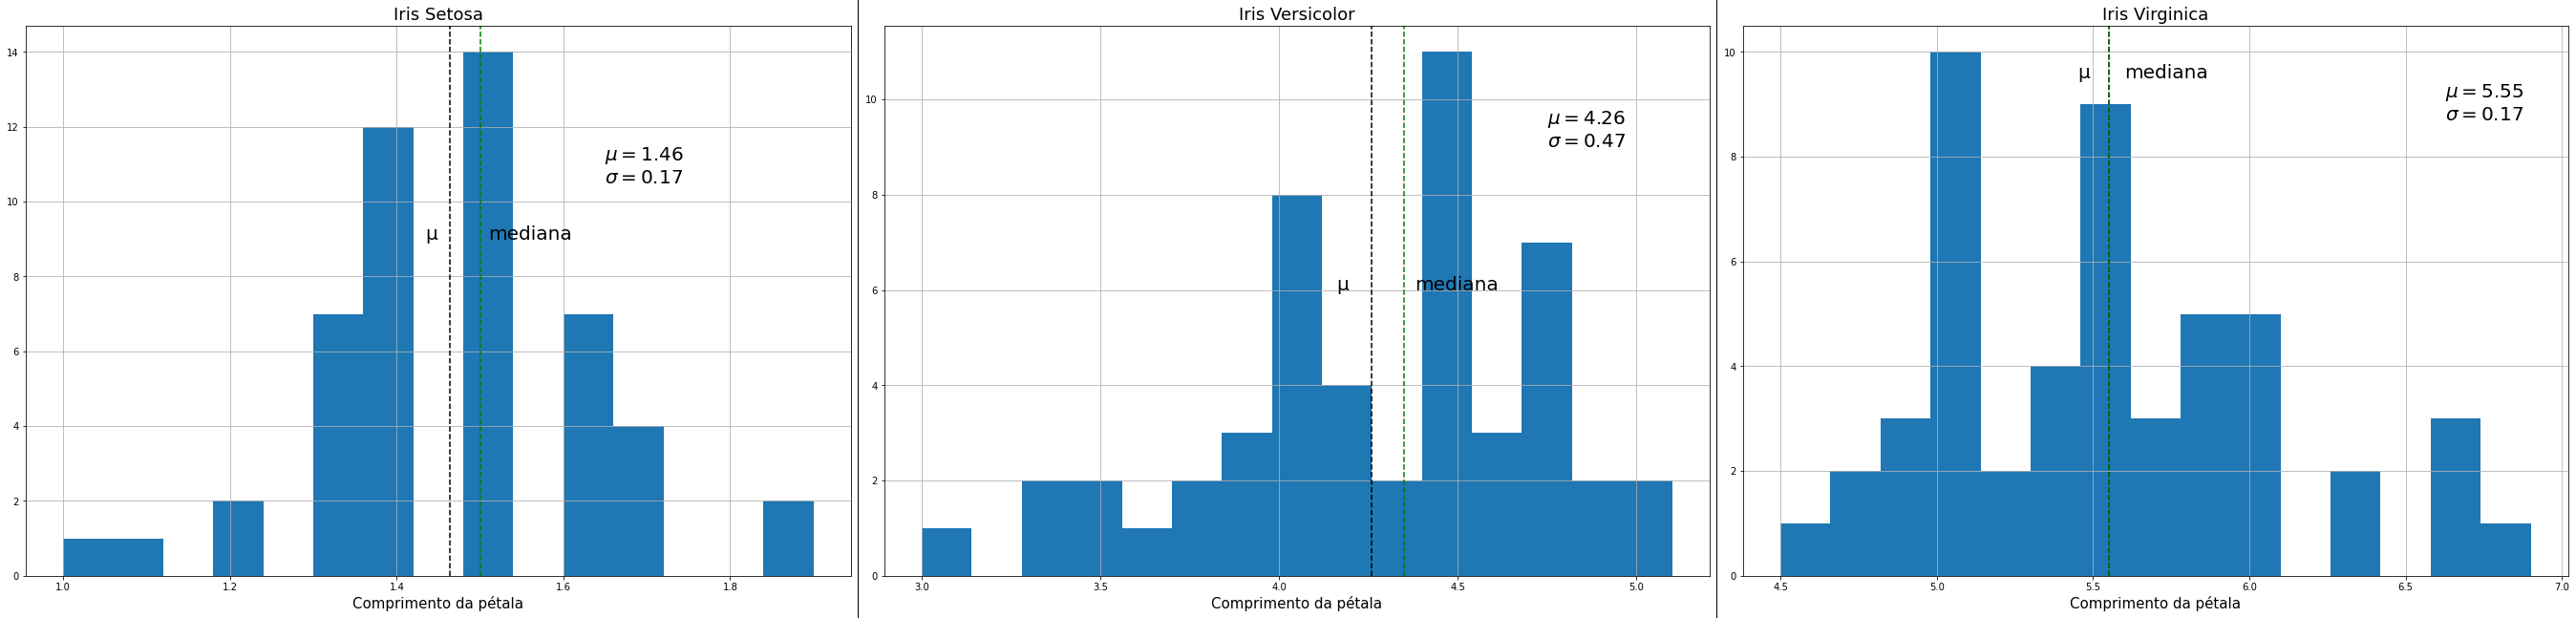

In [144]:
from PIL import Image

largura, altura = Image.open('histograma_Iris_Virginica.png').size
largura_total = 3*largura
combinada = Image.new('RGB',(largura_total, altura))
intervalo = 0

for imagem in map(Image.open, ['histograma_Iris_Setosa.png', 'histograma_Iris_Versicolor.png', 'histograma_Iris_Virginica.png']):
  combinada.paste(imagem, (intervalo, 0))
  intervalo += largura

combinada.save('combinada.png')
combinada